In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import statistics as st
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("DATASET-balanced 1.csv")

In [3]:
target = df["LABEL"]

In [4]:
train = df.drop("LABEL", axis = 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    train, target, test_size=0.20, random_state=0)

In [6]:
model_1 = RandomForestClassifier()
model_2 = DecisionTreeClassifier()

In [14]:
weights = [0.1, 0.1]

In [15]:
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)

In [17]:
pred_final = np.round((weights[0]*pred_1 + weights[1]*pred_2) / sum(weights))

In [18]:
accuracy = round(accuracy_score(y_test, pred_final) * 100, 3)
auc = round(roc_auc_score(y_test, pred_final), 3)
prec = round(precision_score(y_test, pred_final, average="micro", pos_label=1), 3)
rec = round(recall_score(y_test, pred_final, average="micro", pos_label=1), 3)
f1 = round(f1_score(y_test, pred_final, average="micro", pos_label=1), 3)
mcc = round(matthews_corrcoef(y_test, pred_final), 3)
mse = round(mean_squared_error(y_test, pred_final), 3)
mae = round(mean_absolute_error(y_test, pred_final), 3)

In [19]:
print(f" Accuracy: {accuracy}%")
print(f" AUC score: {auc}")
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)
print("MCC:", mcc)
print("Mean Squared Error (MSE) :", mse)
print("Mean Absolute Error (MAE):", mae)

 Accuracy: 96.986%
 AUC score: 0.971
Precision: 0.97
Recall: 0.97
F1-score: 0.97
MCC: 0.941
Mean Squared Error (MSE) : 0.03
Mean Absolute Error (MAE): 0.03


Confusion Matrix:
[[1130    7]
 [  64 1155]]


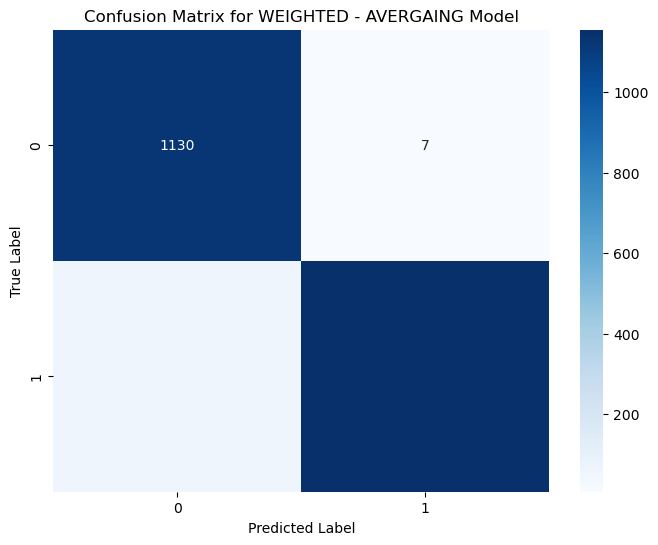

In [20]:
conf_matrix = confusion_matrix(y_test, pred_final)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the heat map for AdaBoost model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for WEIGHTED - AVERGAING Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()